In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from skopt import BayesSearchCV
from skopt.space import Integer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
DC = np.load('../Bases/Criados/Treino_Teste/treino_teste.npz', allow_pickle=True)
X_treino, X_teste, y_treino, y_teste, feature_names = DC['X_treino'], DC['X_teste'], DC['y_treino'], DC['y_teste'], list(DC['feature_names'])

In [3]:
len(X_treino)

17022

In [4]:
DC_over = np.load('../Bases/Criados/Treino_Teste/over.npz', allow_pickle=True)
X_treino_over, X_teste_over, y_treino_over, y_teste_over, feature_names= DC_over['X_treino'], DC_over['X_teste'], DC_over['y_treino'], DC_over['y_teste'], list(DC_over['feature_names'])

In [5]:
len(X_treino_over)

31752

In [6]:
DC_under = np.load('../Bases/Criados/Treino_Teste/under.npz', allow_pickle=True)
X_treino_under, X_teste_under, y_treino_under, y_teste_under, feature_names = DC_under['X_treino'], DC_under['X_teste'], DC_under['y_treino'], DC_under['y_teste'], list(DC_under['feature_names'])

In [7]:
len(X_treino_under)

16856

In [8]:
DC_random_under = np.load('../Bases/Criados/Treino_Teste/random.npz', allow_pickle=True)
X_treino_rd_under, X_teste_rd_under, y_treino_rd_under, y_teste_rd_under, feature_names = DC_random_under['X_treino'], DC_random_under['X_teste'], DC_random_under['y_treino'], DC_random_under['y_teste'], list(DC_random_under['feature_names'])

In [9]:
len(X_treino_rd_under)

2292

In [10]:
DC_DSTO = np.load('../Bases/Criados/Treino_Teste/dsto.npz', allow_pickle=True)
X_treino_DSTO, X_teste_DSTO, y_treino_DSTO, y_teste_DSTO, feature_names = DC_DSTO['X_treino'], DC_DSTO['X_teste'], DC_DSTO['y_treino'], DC_DSTO['y_teste'], list(DC_DSTO['feature_names'])

In [11]:
len(X_treino_DSTO)

31752

## Parametros e funcoes

In [12]:
param_bayes = {
    'criterion':  ['gini', 'entropy'],
    'max_depth': Integer(1, 50),
    'min_samples_split': Integer(2, 20),
    'min_samples_leaf': Integer(1, 10),
    'n_estimators': Integer(50, 120),
    'max_features': Integer(2, 5)
}

# Modelos

### Modelo Padrao

In [13]:
bayes_search = BayesSearchCV(RandomForestClassifier(), param_bayes, n_iter=50, cv=5, scoring='accuracy', random_state=42)
bayes_search.fit(X_treino, y_treino)
print("\nMelhores parâmetros encontrados com BayesSearchCV:")
print(bayes_search.best_params_)
print("Melhor pontuação de validação cruzada: {:.2f}".format(bayes_search.best_score_))


Melhores parâmetros encontrados com BayesSearchCV:
OrderedDict({'criterion': 'gini', 'max_depth': 37, 'max_features': 5, 'min_samples_leaf': 4, 'min_samples_split': 14, 'n_estimators': 79})
Melhor pontuação de validação cruzada: 1.00


In [14]:
best_model_bayes = bayes_search.best_estimator_

### Resultados

In [15]:
previsoes_bayes = best_model_bayes.predict(X_teste)
accuracy_bayes = accuracy_score(y_teste, previsoes_bayes)
print("Acurácia do melhor modelo (BayesSearchCV) no conjunto de teste: {:.2f}".format(accuracy_bayes))

Acurácia do melhor modelo (BayesSearchCV) no conjunto de teste: 1.00


In [16]:
print(classification_report(y_teste, previsoes_bayes))

              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00       517
         2.0       1.00      1.00      1.00      6779

    accuracy                           1.00      7296
   macro avg       1.00      1.00      1.00      7296
weighted avg       1.00      1.00      1.00      7296



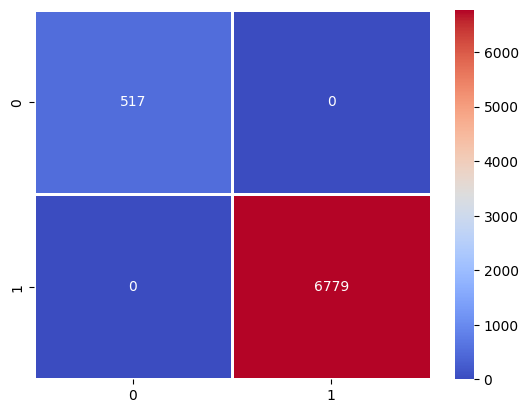

In [17]:
cfm_matrix = confusion_matrix(y_teste,previsoes_bayes)
sns.heatmap(cfm_matrix, cmap='coolwarm', annot=True, linewidth=1, fmt='d')
plt.show()

Variáveis mais relevantes:
Q06507: 0.18980195391857435
Q06506: 0.15407277007859818
Q06508: 0.15292427477412415
Q06601: 0.14428834433124882
Q064: 0.13690117550495243
Q067: 0.11582370979300981
Q06509: 0.0977103736682167
Doenca_limitante: 0.001978902456514052
Q00201: 0.0018746776345478335
Q060: 0.0009991604473449046
Q068: 0.0008444882583267822
J00101: 0.0004638050449560589
N010: 0.000343512893480169
AusenciaTrabalhoPorDC: 0.0002940205686307326
Horas_trabalhadas: 0.0002651579253040873
N016: 0.00023902542187898308
Q03001: 0.00021646986768832826
Tempo_parou_fumar: 0.00014681820391076263
V0001: 0.00013587612779452542
Renda: 0.00013132744822212054
P02601: 8.402916864274154e-05
Q11006: 6.97617706891744e-05
V0026: 6.805023114081013e-05
N011: 5.893151803121545e-05
P018: 5.316174344388387e-05
P04501: 3.6880147765915104e-05
C011: 3.085151611921315e-05
N012: 2.2682056609035866e-05
C009: 2.1160018520174507e-05
P00901: 1.6447933068134757e-05
P04502: 1.641726145906424e-05
Quant_trabalhos: 1.41147481539

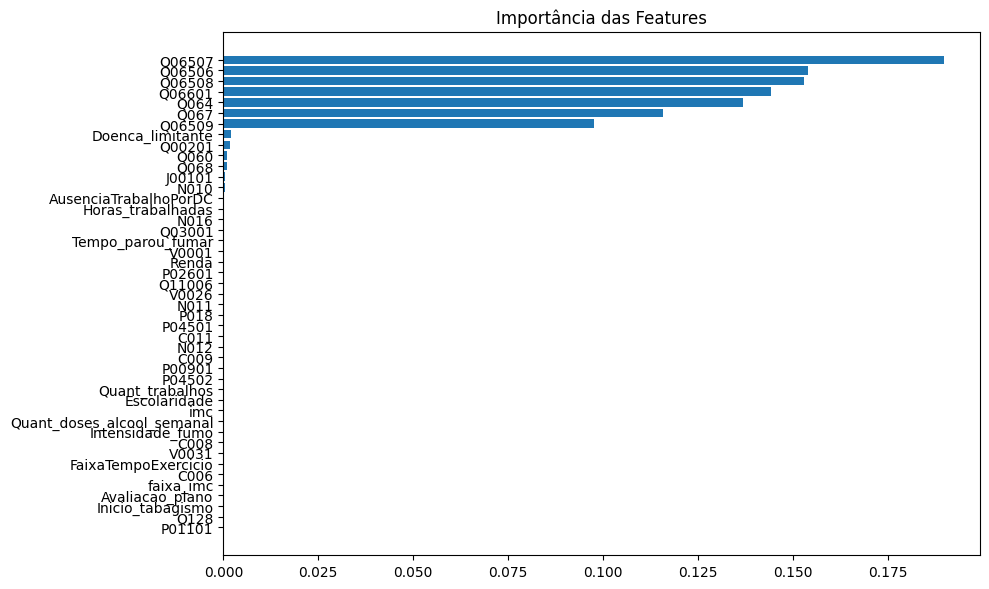

In [18]:
# Obter a importância das features
importancias = best_model_bayes.feature_importances_

# Pegando os nomes dos atributos
nomes_das_features = feature_names

# Ordenar as features com base na importância
indices_ordenados = np.argsort(importancias)[::-1]

# Exibir as features mais importantes
print("Variáveis mais relevantes:")
for idx in indices_ordenados:
    print(f"{nomes_das_features[idx]}: {importancias[idx]}")

# Plotar a importância das features
plt.figure(figsize=(10, 6))
plt.title("Importância das Features")
plt.barh(range(X_treino.shape[1]), importancias[indices_ordenados], align="center")
nomes_array = np.array(nomes_das_features)
plt.yticks(range(X_treino.shape[1]), nomes_array[indices_ordenados])
plt.gca().invert_yaxis()  # Inverter o eixo y para que as features mais importantes fiquem no topo
plt.tight_layout()
plt.show()

### OverSampling

In [19]:
bayes_search.fit(X_treino_over, y_treino_over)
print("\nMelhores parâmetros encontrados com BayesSearchCV:")
print(bayes_search.best_params_)
print("Melhor pontuação de validação cruzada: {:.2f}".format(bayes_search.best_score_))


Melhores parâmetros encontrados com BayesSearchCV:
OrderedDict({'criterion': 'gini', 'max_depth': 37, 'max_features': 5, 'min_samples_leaf': 4, 'min_samples_split': 14, 'n_estimators': 79})
Melhor pontuação de validação cruzada: 1.00


In [20]:
best_model_bayes = bayes_search.best_estimator_

In [21]:
previsoes_bayes = best_model_bayes.predict(X_teste_over)

In [22]:
print(classification_report(y_teste_over, previsoes_bayes))

              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00       517
         2.0       1.00      1.00      1.00      6779

    accuracy                           1.00      7296
   macro avg       1.00      1.00      1.00      7296
weighted avg       1.00      1.00      1.00      7296



Variáveis mais relevantes:
Q06509: 0.17420920123416198
Q06506: 0.15216574420959536
Q06601: 0.14432639922795965
Q067: 0.13483368288442926
Q06508: 0.12286764088459229
Q06507: 0.11430769572078628
Q064: 0.08031132820019253
Q060: 0.016286749856440318
Doenca_limitante: 0.012155210109879883
N011: 0.00822298745278558
Q00201: 0.006201210032753676
J00101: 0.006162099024303509
N010: 0.006063029840748931
Q03001: 0.00488447801084093
N016: 0.004356134285006467
C011: 0.0033019582368899107
P02601: 0.003079487842041
N012: 0.0016954265327860075
V0026: 0.0009193586396320706
C008: 0.0008070387063879428
P04501: 0.0007682485746515042
C006: 0.0006649166092116161
FaixaTempoExercicio: 0.0004843263285520584
Q128: 0.00024130657347872682
Horas_trabalhadas: 0.00023162921266367903
C009: 0.00021649363272634165
P018: 0.00016819511737228208
Intensidade_fumo: 2.4995781130973503e-05
P01101: 1.9899863426437295e-05
imc: 9.404313398031617e-06
Q068: 8.414363460182779e-06
faixa_imc: 1.7167533119652393e-06
Avaliacao_plano: 1.

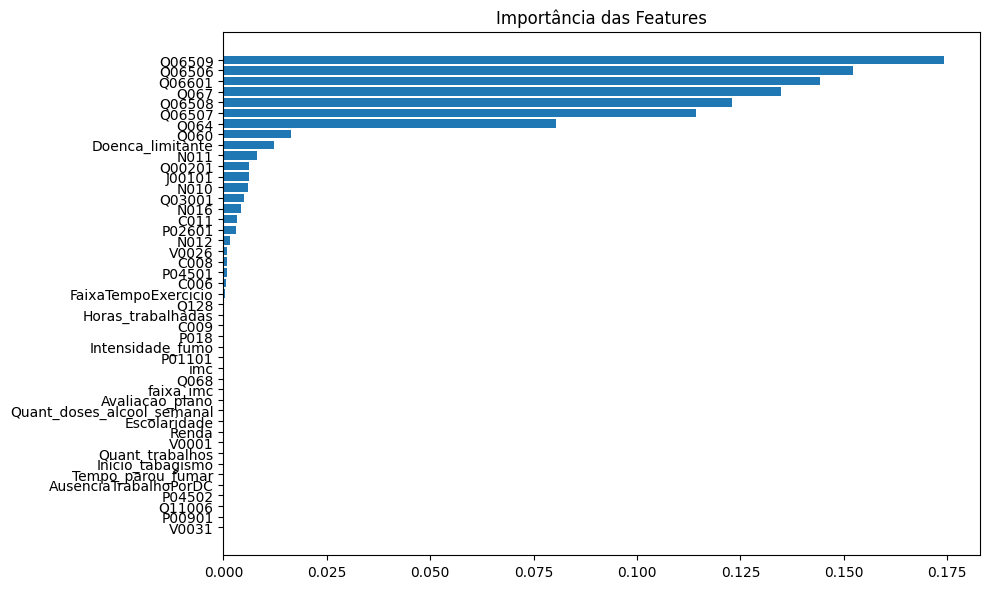

In [23]:
# Obter a importância das features
importancias = best_model_bayes.feature_importances_

# Pegando os nomes dos atributos
nomes_das_features = feature_names

# Ordenar as features com base na importância
indices_ordenados = np.argsort(importancias)[::-1]

# Exibir as features mais importantes
print("Variáveis mais relevantes:")
for idx in indices_ordenados:
    print(f"{nomes_das_features[idx]}: {importancias[idx]}")

# Plotar a importância das features
plt.figure(figsize=(10, 6))
plt.title("Importância das Features")
plt.barh(range(X_treino.shape[1]), importancias[indices_ordenados], align="center")
nomes_array = np.array(nomes_das_features)
plt.yticks(range(X_treino.shape[1]), nomes_array[indices_ordenados])
plt.gca().invert_yaxis()  # Inverter o eixo y para que as features mais importantes fiquem no topo
plt.tight_layout()
plt.show()

### UnderSampling

In [24]:
bayes_search.fit(X_treino_under, y_treino_under)
print("\nMelhores parâmetros encontrados com BayesSearchCV:")
print(bayes_search.best_params_)
print("Melhor pontuação de validação cruzada: {:.2f}".format(bayes_search.best_score_))


Melhores parâmetros encontrados com BayesSearchCV:
OrderedDict({'criterion': 'gini', 'max_depth': 37, 'max_features': 5, 'min_samples_leaf': 4, 'min_samples_split': 14, 'n_estimators': 79})
Melhor pontuação de validação cruzada: 1.00


In [25]:
best_model_bayes = bayes_search.best_estimator_

In [26]:
previsoes_bayes = best_model_bayes.predict(X_teste_under)

In [27]:
print(classification_report(y_teste_under, previsoes_bayes))

              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00       517
         2.0       1.00      1.00      1.00      6779

    accuracy                           1.00      7296
   macro avg       1.00      1.00      1.00      7296
weighted avg       1.00      1.00      1.00      7296



Variáveis mais relevantes:
Q06509: 0.1704517584879463
Q06507: 0.16658051112571026
Q067: 0.1653546641910182
Q06506: 0.146819599729596
Q06508: 0.14343416781623344
Q06601: 0.1059156755013058
Q064: 0.08789764618611455
Doenca_limitante: 0.00261727878660816
Q060: 0.0021401942884925595
Q00201: 0.0021336042578947918
C008: 0.0013790384156907628
Horas_trabalhadas: 0.0009605721211263267
N010: 0.0006261291680468094
Q068: 0.0005874856966175212
AusenciaTrabalhoPorDC: 0.00044545936459652706
Q03001: 0.0004196684338243311
J00101: 0.00033383399502380566
N011: 0.00028795788253900415
Quant_trabalhos: 0.00028614559536078055
N012: 0.00021224452178620102
N016: 0.00015124701642853437
Renda: 0.00013269622326651993
Tempo_parou_fumar: 0.0001087943704354405
P02601: 8.227162933472717e-05
P04502: 7.934400692981996e-05
V0001: 7.484317478008854e-05
P018: 6.977008444094912e-05
C011: 6.928653889626029e-05
imc: 6.355590613567093e-05
P04501: 5.034564118252911e-05
Avaliacao_plano: 4.064874097499774e-05
V0031: 3.3380131720

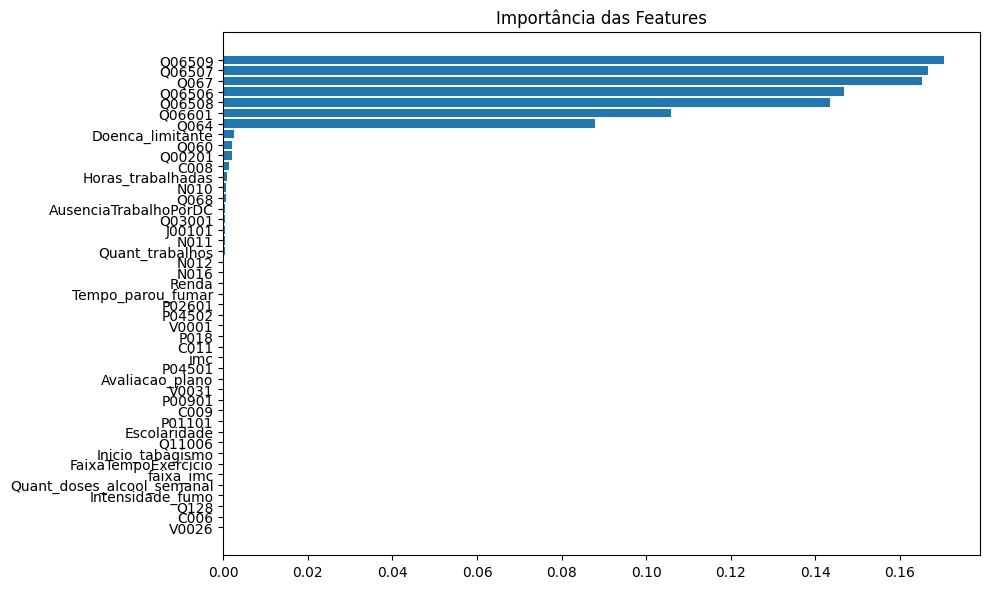

In [28]:
# Obter a importância das features
importancias = best_model_bayes.feature_importances_

# Pegando os nomes dos atributos
nomes_das_features = feature_names

# Ordenar as features com base na importância
indices_ordenados = np.argsort(importancias)[::-1]

# Exibir as features mais importantes
print("Variáveis mais relevantes:")
for idx in indices_ordenados:
    print(f"{nomes_das_features[idx]}: {importancias[idx]}")

# Plotar a importância das features
plt.figure(figsize=(10, 6))
plt.title("Importância das Features")
plt.barh(range(X_treino.shape[1]), importancias[indices_ordenados], align="center")
nomes_array = np.array(nomes_das_features)
plt.yticks(range(X_treino.shape[1]), nomes_array[indices_ordenados])
plt.gca().invert_yaxis()  # Inverter o eixo y para que as features mais importantes fiquem no topo
plt.tight_layout()
plt.show()

### Random UnderSampling

In [29]:
bayes_search.fit(X_treino_rd_under, y_treino_rd_under)
print("\nMelhores parâmetros encontrados com BayesSearchCV:")
print(bayes_search.best_params_)
print("Melhor pontuação de validação cruzada: {:.2f}".format(bayes_search.best_score_))


Melhores parâmetros encontrados com BayesSearchCV:
OrderedDict({'criterion': 'gini', 'max_depth': 37, 'max_features': 5, 'min_samples_leaf': 4, 'min_samples_split': 14, 'n_estimators': 79})
Melhor pontuação de validação cruzada: 1.00


In [30]:
best_model_bayes = bayes_search.best_estimator_

In [31]:
previsoes_bayes = best_model_bayes.predict(X_teste_rd_under)

In [32]:
print(classification_report(y_teste_rd_under, previsoes_bayes))

              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00       517
         2.0       1.00      1.00      1.00      6779

    accuracy                           1.00      7296
   macro avg       1.00      1.00      1.00      7296
weighted avg       1.00      1.00      1.00      7296



Variáveis mais relevantes:
Q067: 0.19144486359861623
Q06508: 0.16466348950305926
Q06601: 0.14152984726609036
Q06507: 0.14016456948208142
Q06506: 0.13670816616003548
Q06509: 0.12407029097389413
Q064: 0.050343202642283785
Doenca_limitante: 0.02444177136414522
Q00201: 0.007440063662999794
N010: 0.004081707030889815
Q060: 0.004027161767683879
Quant_trabalhos: 0.002129866010009336
N011: 0.0021127752764464993
Q068: 0.0010636234997607422
Q03001: 0.0008957766288056267
J00101: 0.0008734046512772919
Horas_trabalhadas: 0.0008341974137981947
C008: 0.0007486167519413793
Renda: 0.00041709815868577353
N016: 0.00039012464768128696
V0001: 0.00037793586963532586
N012: 0.00019993493730594683
P018: 0.00018575870400672656
C009: 0.00010824031719297216
faixa_imc: 9.740244541750485e-05
imc: 9.039197158427391e-05
Escolaridade: 8.605724259860088e-05
V0031: 8.498720256703929e-05
Tempo_parou_fumar: 7.806542245644803e-05
P04501: 6.154236355291202e-05
Avaliacao_plano: 5.850171639056854e-05
P02601: 5.032996169282611

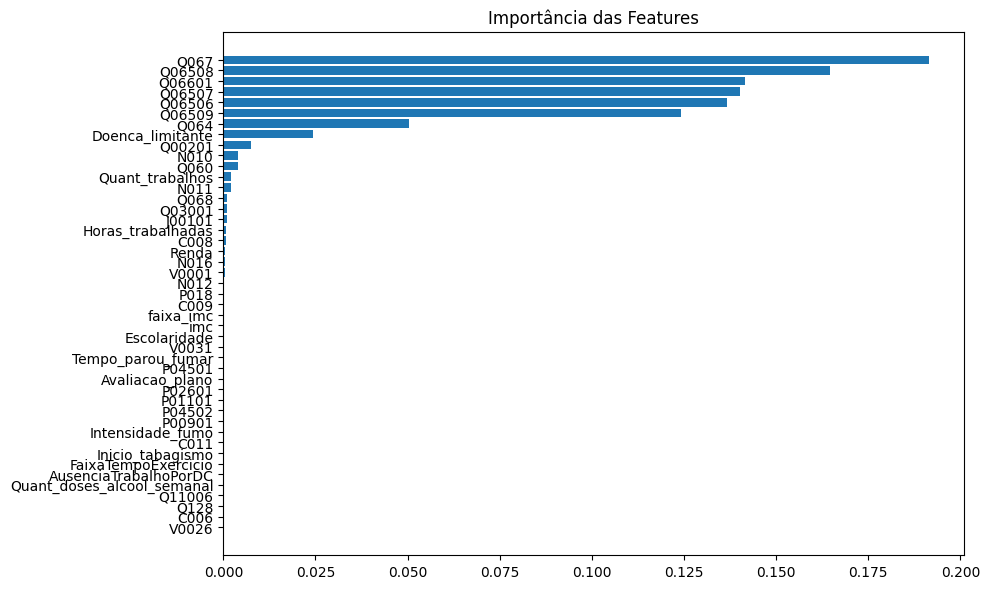

In [33]:
# Obter a importância das features
importancias = best_model_bayes.feature_importances_

# Pegando os nomes dos atributos
nomes_das_features = feature_names

# Ordenar as features com base na importância
indices_ordenados = np.argsort(importancias)[::-1]

# Exibir as features mais importantes
print("Variáveis mais relevantes:")
for idx in indices_ordenados:
    print(f"{nomes_das_features[idx]}: {importancias[idx]}")

# Plotar a importância das features
plt.figure(figsize=(10, 6))
plt.title("Importância das Features")
plt.barh(range(X_treino.shape[1]), importancias[indices_ordenados], align="center")
nomes_array = np.array(nomes_das_features)
plt.yticks(range(X_treino.shape[1]), nomes_array[indices_ordenados])
plt.gca().invert_yaxis()  # Inverter o eixo y para que as features mais importantes fiquem no topo
plt.tight_layout()
plt.show()

### DSTO

In [34]:
bayes_search.fit(X_treino_DSTO, y_treino_DSTO)
print("\nMelhores parâmetros encontrados com BayesSearchCV:")
print(bayes_search.best_params_)
print("Melhor pontuação de validação cruzada: {:.2f}".format(bayes_search.best_score_))


Melhores parâmetros encontrados com BayesSearchCV:
OrderedDict({'criterion': 'gini', 'max_depth': 37, 'max_features': 5, 'min_samples_leaf': 4, 'min_samples_split': 14, 'n_estimators': 79})
Melhor pontuação de validação cruzada: 0.96


In [35]:
best_model_bayes = bayes_search.best_estimator_

In [36]:
previsoes_bayes = best_model_bayes.predict(X_teste_DSTO)

In [37]:
print(classification_report(y_teste_DSTO, previsoes_bayes))

              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00       517
         2.0       1.00      1.00      1.00      6779

    accuracy                           1.00      7296
   macro avg       1.00      1.00      1.00      7296
weighted avg       1.00      1.00      1.00      7296



Variáveis mais relevantes:
Q06507: 0.13614653417779832
Q068: 0.12091503932759454
Q067: 0.10896986685833636
Q064: 0.07652237689048424
Q06601: 0.07499353571948353
Q128: 0.07184936193968507
Q06506: 0.06737864967757981
P02601: 0.042793024442451325
Q03001: 0.029674451488278717
Q11006: 0.029205726090140688
Q06508: 0.028758638343979324
V0001: 0.028107738519370203
Q06509: 0.02746033399171708
N012: 0.023007912714692234
imc: 0.02196718854049538
Q060: 0.01871751394347379
Intensidade_fumo: 0.014820775465879031
Renda: 0.014140307770970783
Avaliacao_plano: 0.010668742110330665
AusenciaTrabalhoPorDC: 0.009892299266947301
Quant_doses_alcool_semanal: 0.009042102833767645
N016: 0.006954643702099495
J00101: 0.006079457019411331
V0031: 0.005491377312892667
N010: 0.004698397172544715
Doenca_limitante: 0.0032019420531574395
faixa_imc: 0.0023835218919055247
C006: 0.001229165601960931
Quant_trabalhos: 0.0010281339163217738
P04501: 0.0009745021588737297
Q00201: 0.0007267278243459593
Inicio_tabagismo: 0.0005819

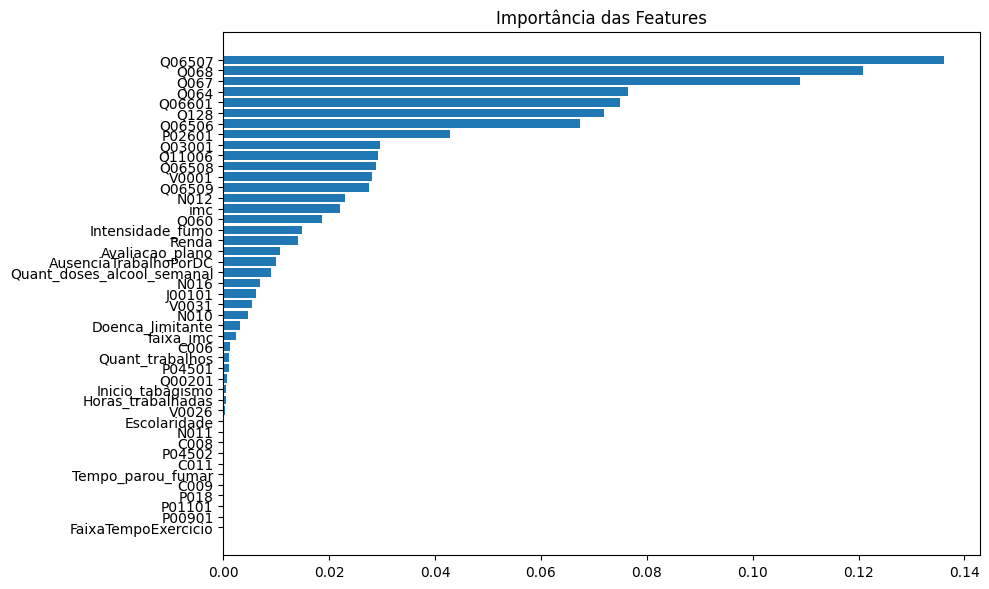

In [38]:
# Obter a importância das features
importancias = best_model_bayes.feature_importances_

# Pegando os nomes dos atributos
nomes_das_features = feature_names

# Ordenar as features com base na importância
indices_ordenados = np.argsort(importancias)[::-1]

# Exibir as features mais importantes
print("Variáveis mais relevantes:")
for idx in indices_ordenados:
    print(f"{nomes_das_features[idx]}: {importancias[idx]}")

# Plotar a importância das features
plt.figure(figsize=(10, 6))
plt.title("Importância das Features")
plt.barh(range(X_treino.shape[1]), importancias[indices_ordenados], align="center")
nomes_array = np.array(nomes_das_features)
plt.yticks(range(X_treino.shape[1]), nomes_array[indices_ordenados])
plt.gca().invert_yaxis()  # Inverter o eixo y para que as features mais importantes fiquem no topo
plt.tight_layout()
plt.show()